In [274]:
import numpy as np
import mpmath as mp
import math
from scipy.special import comb

mp.dps = 50

For $p=.5,$ the probability mass function of the binomial distribution is:

\begin{align*}
   f(k; N\!, p) &= {N \choose  k} p^k (1-p)^{N-k} \\
           &= {N \choose  k} \times .5^N \\
           &= 2^{-N} {N \choose  k}.
\end{align*}

In [299]:
class BirthDistribution(object):
    def __init__(self):
        self._cache = dict()
        
    def _calculate(self, npairs):
        d = np.empty(npairs+1, dtype=object)
        if npairs == 1:
            d[:] = mp.mpf(1/2)
        else:
            # Calculate according to Pascal's triangle, and normalize.
            mid = (len(d) + 1) // 2
            pred = self._cache[npairs-1]
            d[0] = pred[0]
            d[1:mid] = pred[0:mid-1] + pred[1:mid]
            d[:mid] /= mp.mpf(2)
            d[-mid:] = d[:mid][::-1]
        self._cache[npairs] = d
        return d
    
    def __call__(self, popsize):
        npairs = popsize // 2
        try:
            return self._cache[npairs]
        except:
            return self._calculate(npairs)

birth_dist = BirthDistribution()

In [276]:
birth_dist(2)

array([mpf('0.5'), mpf('0.5')], dtype=object)

In [277]:
birth_dist(3)

array([mpf('0.5'), mpf('0.5')], dtype=object)

In [278]:
birth_dist(4)

array([mpf('0.25'), mpf('0.5'), mpf('0.25')], dtype=object)

In [279]:
birth_dist(5)

array([mpf('0.25'), mpf('0.5'), mpf('0.25')], dtype=object)

In [280]:
birth_dist(6)

array([mpf('0.125'), mpf('0.375'), mpf('0.375'), mpf('0.125')],
      dtype=object)

In [281]:
def next_dist(popdist):
    maxbirths = (len(popdist) - 1) // 2
    result = np.empty(len(popdist) + maxbirths, dtype=object)
    result[:] = mp.mpf(0)
    for popsize, prob in enumerate(popdist):
        if prob > 0:
            d = prob * birth_dist(popsize)
            result[popsize:popsize+len(d)] += d
    return result

In [282]:
init_dist = np.array([mp.mpf(0), mp.mpf(0), mp.mpf(1)])
init_dist

array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object)

In [283]:
next_dist(init_dist)

array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object)

In [284]:
next_dist(next_dist(init_dist))

array([mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.5'), mpf('0.25')],
      dtype=object)

In [327]:
def power(popsize, exponent):
    dist = np.empty(exponent+1, dtype=object)
    dist[0] = np.empty(popsize+1, dtype=object)
    dist[0][:popsize] = mp.mpf(0)
    dist[0][popsize] = mp.mpf(1)
    exp_popsize = np.empty_like(dist)
    exp_popsize[0] = mp.mpf(popsize)
    for i in range(1, exponent+1):
        dist[i] = next_dist(dist[i-1])
        exp_popsize[i] = mp.fsum(dist[i] * range(len(dist[i])))
    return dist, exp_popsize

In [328]:
power(2, 0)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object)],
       dtype=object),
 array([mpf('2.0')], dtype=object))

In [286]:
power(2, 1)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object)],
       dtype=object),
 array([mpf('2.0'), mpf('2.5')], dtype=object))

In [287]:
power(2, 2)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.5'), mpf('0.25')],
       dtype=object)], dtype=object),
 array([mpf('2.0'), mpf('2.5'), mpf('3.0')], dtype=object))

In [288]:
power(2, 3)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.5'), mpf('0.25')],
       dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.125'), mpf('0.375'), mpf('0.3125'),
        mpf('0.125'), mpf('0.0625')], dtype=object)], dtype=object),
 array([mpf('2.0'), mpf('2.5'), mpf('3.0'), mpf('3.625')], dtype=object))

In [289]:
power(2, 4)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.5'), mpf('0.25')],
       dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.125'), mpf('0.375'), mpf('0.3125'),
        mpf('0.125'), mpf('0.0625')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0625'), mpf('0.25'),
        mpf('0.265625'), mpf('0.1875'), mpf('0.1484375'), mpf('0.0546875'),
        mpf('0.0234375'), mpf('0.0078125')], dtype=object)], dtype=object),
 array([mpf('2.0'), mpf('2.5'), mpf('3.0'), mpf('3.625'), mpf('4.40625')],
       dtype=object))

In [290]:
power(2, 5)

(array([array([mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.5'), mpf('0.25')],
       dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.125'), mpf('0.375'), mpf('0.3125'),
        mpf('0.125'), mpf('0.0625')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0625'), mpf('0.25'),
        mpf('0.265625'), mpf('0.1875'), mpf('0.1484375'), mpf('0.0546875'),
        mpf('0.0234375'), mpf('0.0078125')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.03125'), mpf('0.15625'),
        mpf('0.19140625'), mpf('0.1796875'), mpf('0.1787109375'),
        mpf('0.109375'), mpf('0.07763671875'), mpf('0.04541015625'),
        mpf('0.017578125'), mpf('0.0087890625'), mpf('0.00341796875'),
        mpf('0.00048828125')], dtype=object)], dtype=object),
 array([mpf('2.0'), mpf('2.5'), mpf('3.0'), mpf('3.625'), mpf('4.40625'),
   

In [331]:
power(3, 4)

(array([array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('1.0')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.5'), mpf('0.5')],
       dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.25'), mpf('0.375'),
        mpf('0.25'), mpf('0.125')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.125'), mpf('0.21875'),
        mpf('0.25'), mpf('0.234375'), mpf('0.109375'), mpf('0.046875'),
        mpf('0.015625')], dtype=object),
        array([mpf('0.0'), mpf('0.0'), mpf('0.0'), mpf('0.0625'),
        mpf('0.1171875'), mpf('0.171875'), mpf('0.208984375'),
        mpf('0.1640625'), mpf('0.1318359375'), mpf('0.0830078125'),
        mpf('0.03515625'), mpf('0.017578125'), mpf('0.0068359375'),
        mpf('0.0009765625')], dtype=object)], dtype=object),
 array([mpf('3.0'), mpf('3.5'), mpf('4.25'), mpf('5.1875'),
        mpf('6.359375')], dtype=object))

In [303]:
%%time

dist, expected_size = power(2, 20)
expected_size

CPU times: user 1min 35s, sys: 555 ms, total: 1min 35s
Wall time: 1min 37s


array([mpf('2.0'), mpf('2.5'), mpf('3.0'), mpf('3.625'), mpf('4.40625'),
       mpf('5.3828125'), mpf('6.603515625'), mpf('8.12939453125'),
       mpf('10.0367431640625'), mpf('12.420928955078125'),
       mpf('15.401161193847656'), mpf('19.12645149230957'),
       mpf('23.783064365386963'), mpf('29.603830456733704'),
       mpf('36.87978807091713'), mpf('45.974735088646412'),
       mpf('57.343418860808015'), mpf('71.554273576010019'),
       mpf('89.317841970012523'), mpf('111.52230246251565'),
       mpf('139.27787807814457')], dtype=object)

Observe that the expected value of $(1+1)^N$ is $2\cdot 1.25^{N-1} + 0.5.$

In [325]:
[p for p in zip([2 * 1.25**(k-1) + 0.5 for k in range(1,20)],
                expected_size[1:])]

[(2.5, mpf('2.5')),
 (3.0, mpf('3.0')),
 (3.625, mpf('3.625')),
 (4.40625, mpf('4.40625')),
 (5.3828125, mpf('5.3828125')),
 (6.603515625, mpf('6.603515625')),
 (8.12939453125, mpf('8.12939453125')),
 (10.0367431640625, mpf('10.0367431640625')),
 (12.420928955078125, mpf('12.420928955078125')),
 (15.401161193847656, mpf('15.401161193847656')),
 (19.12645149230957, mpf('19.12645149230957')),
 (23.783064365386963, mpf('23.783064365386963')),
 (29.603830456733704, mpf('29.603830456733704')),
 (36.87978807091713, mpf('36.87978807091713')),
 (45.97473508864641, mpf('45.974735088646412')),
 (57.343418860808015, mpf('57.343418860808015')),
 (71.55427357601002, mpf('71.554273576010019')),
 (89.31784197001252, mpf('89.317841970012523')),
 (111.52230246251565, mpf('111.52230246251565'))]

In [305]:
expected_size[-1] / (mp.mpf('111.52230246251565') * mp.mpf('1.25'))

mpf('0.99910331836958255')

<IPython.core.display.Javascript object>


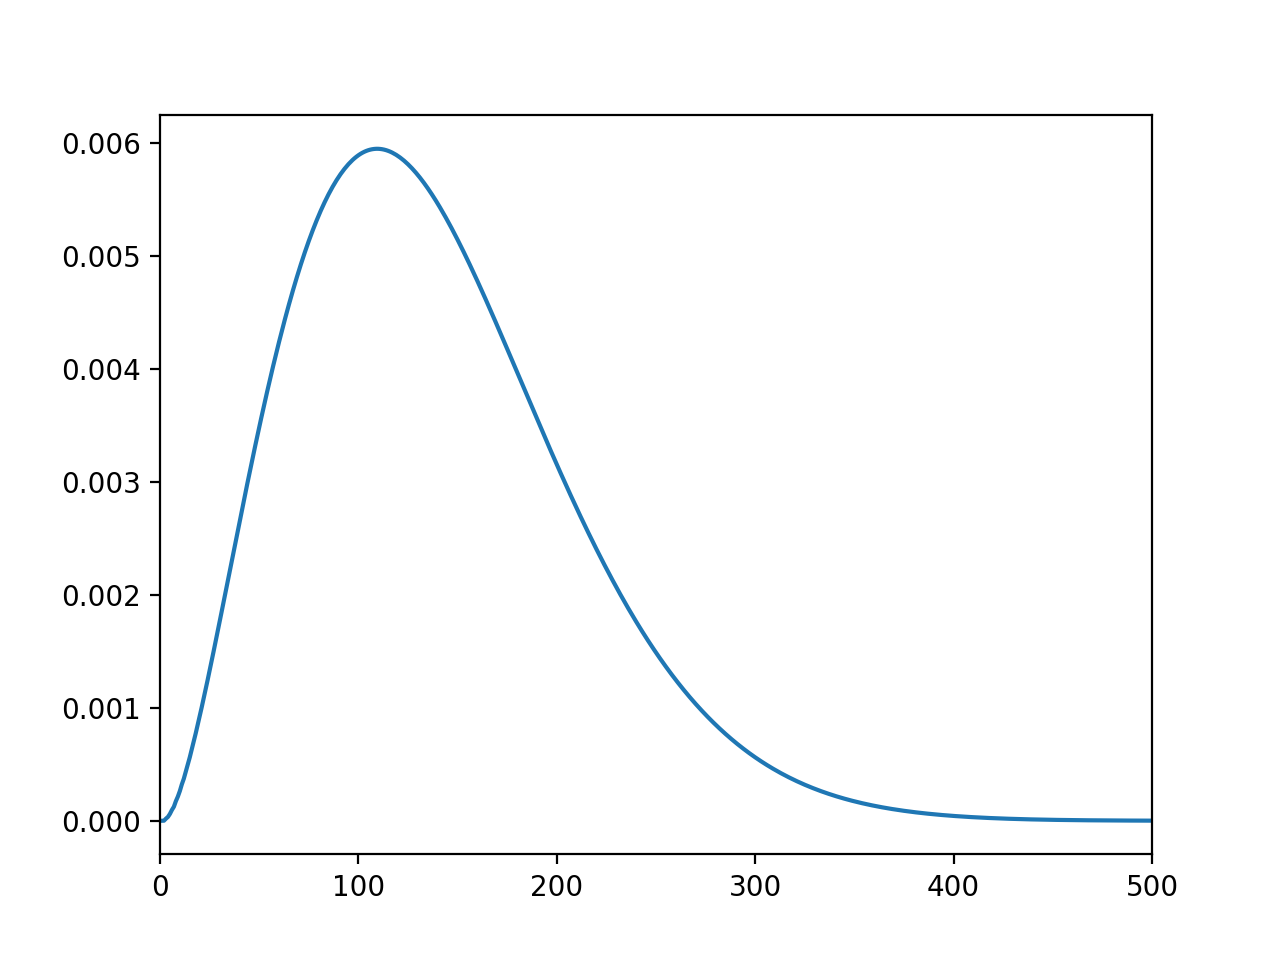

(0, 500)

In [313]:
%matplotlib notebook
import matplotlib.pyplot as plt

fig, ax = plt.subplots()

ax.plot(dist[-1])
ax.set_xlim((0, 500))

In [295]:
[mp.fsum(d) for d in dist]

[mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0'),
 mpf('1.0')]

In [310]:
[len(d) - 2 for d in dist]

[1,
 2,
 3,
 5,
 8,
 12,
 18,
 27,
 41,
 62,
 93,
 140,
 210,
 315,
 473,
 710,
 1065,
 1598,
 2397,
 3596,
 5394]

\begin{align*}
   E[2^n] &= \frac{E[2^{n-1}] + E[3^{n-1}]}{2}\\
   2 E[2^n] &= E[2^{n-1}] + E[3^{n-1}] \\
   E[3^{n-1}] &= 2 E[2^n] - E[2^{n-1}] \\
   E[3^{n-1}] &= 2 E[2^n] - E[2^{n-1}] \\
   E[3^{n-1}] &= 2 (2 \cdot 1.25^{n-1} + 0.5) 
                 - (2 \cdot 1.25^{n-2} + 0.5) \\
   E[3^{n-1}] &= 4 \cdot 1.25^{n-1} - 2 \cdot 1.25^{n-2} + 0.5 \\
   E[3^{n}] &= 4 \cdot 1.25^{n} - 2 \cdot 1.25^{n-1} + 0.5 \\
\end{align*}

For $N=n+1,$

\begin{align*}
   E[2^{n+1}] 
      &= \frac{E[2^{n}] + E[3^{n}]}{2} \\
      &= \frac{2 \cdot 1.25^{n-1} + 0.5 
                + 4 \cdot 1.25^{n} - 2 \cdot 1.25^{n-1} + 0.5}
              {2} \\
      &= 1.25^{n-1} + 2 \cdot 1.25^{n} - 1.25^{n-1} + 0.5  \\
      &= 2 \cdot 1.25^{n} + 0.5  \\
\end{align*}

In [337]:
[4 * 1.25**n - 2 * 1.25**(n-1) + 0.5 for n in range(1,6)]

[3.5, 4.25, 5.1875, 6.359375, 7.82421875]

In [336]:
power(3, 5)[1]

array([mpf('3.0'), mpf('3.5'), mpf('4.25'), mpf('5.1875'),
       mpf('6.359375'), mpf('7.82421875')], dtype=object)